# House Prices : Linear Regression

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Reading the dataset into a Pandas DataFrame.

In [6]:

df = pd.read_csv('train.csv', keep_default_na=False)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [7]:

df_test = pd.read_csv('test.csv', keep_default_na=False)
df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [8]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75,9937,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,6,2008,WD,Normal,147500


In [10]:
df_test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotFrontage    1459 non-null   object
 4   LotArea        1459 non-null   int64 
 5   Street         1459 non-null   object
 6   Alley          1459 non-null   object
 7   LotShape       1459 non-null   object
 8   LandContour    1459 non-null   object
 9   Utilities      1459 non-null   object
 10  LotConfig      1459 non-null   object
 11  LandSlope      1459 non-null   object
 12  Neighborhood   1459 non-null   object
 13  Condition1     1459 non-null   object
 14  Condition2     1459 non-null   object
 15  BldgType       1459 non-null   object
 16  HouseStyle     1459 non-null   object
 17  OverallQual    1459 non-null   int64 
 18  OverallCond    1459 non-null

In [11]:
df_test.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH          80    11622   Pave    NA      Reg   
1     1462          20       RL          81    14267   Pave    NA      IR1   
2     1463          60       RL          74    13830   Pave    NA      IR1   
3     1464          60       RL          78     9978   Pave    NA      IR1   
4     1465         120       RL          43     5005   Pave    NA      IR1   
...    ...         ...      ...         ...      ...    ...   ...      ...   
1454  2915         160       RM          21     1936   Pave    NA      Reg   
1455  2916         160       RM          21     1894   Pave    NA      Reg   
1456  2917          20       RL         160    20000   Pave    NA      Reg   
1457  2918          85       RL          62    10441   Pave    NA      Reg   
1458  2919          60       RL          74     9627   Pave    NA      Reg   

     LandContour Utilities  .

## 2 Data Preprocessing

### 2.1 Data Types and non-null values

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

### 2.2 Statistical Summary

In [28]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


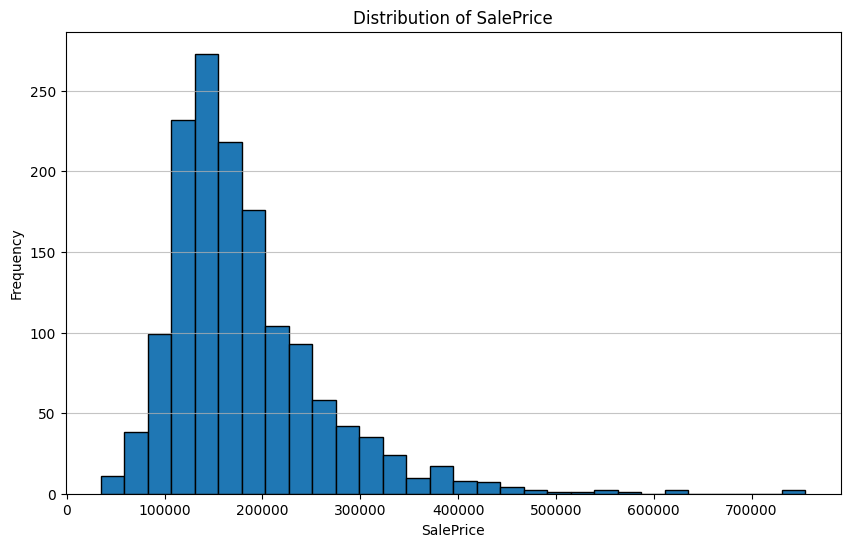

In [29]:
# Plotting the distribution of SalePrice
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [30]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numerical_columns)

Numerical Columns: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [31]:
#List of Categorical variables
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables:", categorical_vars)
#LotFrontage is a numerical variable, which contains 'NA' replacing by mean values 
df['LotFrontage'] = df['LotFrontage'].replace('NA', np.nan)
df['LotFrontage'] = df['LotFrontage'].astype(float)
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df.head()

Categorical Variables: ['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


/tmp/ipykernel_11894/2609515672.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


### 2.3 Handling Missing Values

In [32]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

## 3. Splitting the dataset
Divide the dataset into two sets using k-fold
cross validation technique entitled to train and test set respectively.

In [ ]:
features_model1 = ['LotFrontage', 'LotArea']
features_model2 = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']
features_model3 = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']

# Check for missing values in our target variable and features
print("Missing values in SalePrice:", df['SalePrice'].isnull().sum())
print("Missing values in features:")
for feature in features_model3:
    missing_count = df[feature].isnull().sum()
    print(f"{feature}: {missing_count}")

# Check data types
print(f"\nData types for features:")
for feature in features_model3:
    print(f"{feature}: {df[feature].dtype}")

# Remove any rows with missing values in our target variable or key features
print(f"\nOriginal dataset shape: {df.shape}")
df_clean = df.dropna(subset=['SalePrice'] + features_model3)
print(f"Dataset shape after removing missing values: {df_clean.shape}")

# Prepare target variable
y = df_clean['SalePrice']

# Prepare feature sets
X_model1 = df_clean[features_model1]
X_model2 = df_clean[features_model2]
X_model3 = df_clean[features_model3]

print(f"\nFeature sets prepared:")
print(f"Model 1 features: {features_model1}")
print(f"Model 2 features: {features_model2}")
print(f"Model 3 features: {features_model3}")
print(f"\nTarget variable (y) shape: {y.shape}")
print(f"Model 1 features shape: {X_model1.shape}")
print(f"Model 2 features shape: {X_model2.shape}")
print(f"Model 3 features shape: {X_model3.shape}")

Missing values in SalePrice: 0
Missing values in features:
LotFrontage: 0
LotArea: 0
OverallQual: 0
OverallCond: 0
1stFlrSF: 0
GrLivArea: 0

Data types for features:
LotFrontage: float64
LotArea: int64
OverallQual: int64
OverallCond: int64
1stFlrSF: int64
GrLivArea: int64

Original dataset shape: (1460, 81)
Dataset shape after removing missing values: (1460, 81)

Feature sets prepared:
Model 1 features: ['LotFrontage', 'LotArea']
Model 2 features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']
Model 3 features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']

Target variable (y) shape: (1460,)
Model 1 features shape: (1460, 2)
Model 2 features shape: (1460, 4)
Model 3 features shape: (1460, 6)


In [34]:

k = 5 
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store results for each model
models_data = {
    'Simple Linear Regression (LotArea only)': {'features': ['LotArea'], 'X': df_clean[['LotArea']]},
    'Model 1 (LotFrontage, LotArea)': {'features': features_model1, 'X': X_model1},
    'Model 2 (LotFrontage, LotArea, OverallQual, OverallCond)': {'features': features_model2, 'X': X_model2},
    'Model 3 (All features)': {'features': features_model3, 'X': X_model3}
}

# Store results for each model
results = {model_name: {
    'train_mse': [], 'test_mse': [], 'train_r2': [], 'test_r2': [], 
    'coefficients': [], 'intercepts': []
} for model_name in models_data.keys()}

print("Starting K-Fold Cross Validation...")
print(f"Using {k}-fold cross validation")
print("="*60)

Starting K-Fold Cross Validation...
Using 5-fold cross validation


In [35]:

fold = 1
for train_index, test_index in kf.split(y):
    print(f"\nFold {fold}:")
    print("-" * 20)
    
    # Split data for this fold
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train and evaluate each model
    for model_name, model_info in models_data.items():
        X = model_info['X']
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        
        # Create and train linear regression model
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = lr.predict(X_train)
        y_test_pred = lr.predict(X_test)
        
        # Calculate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Store results
        results[model_name]['train_mse'].append(train_mse)
        results[model_name]['test_mse'].append(test_mse)
        results[model_name]['train_r2'].append(train_r2)
        results[model_name]['test_r2'].append(test_r2)
        results[model_name]['coefficients'].append(lr.coef_)
        results[model_name]['intercepts'].append(lr.intercept_)
        
        print(f"{model_name}:")
        print(f"  Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
        print(f"  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    
    fold += 1

print("\nK-Fold Cross Validation completed!")
print("="*60)


Fold 1:
--------------------
Simple Linear Regression (LotArea only):
  Train MSE: 5541876621.93, Test MSE: 7189094014.83
  Train R²: 0.0709, Test R²: 0.0627
Model 1 (LotFrontage, LotArea):
  Train MSE: 5187706359.35, Test MSE: 6391769244.79
  Train R²: 0.1302, Test R²: 0.1667
Model 2 (LotFrontage, LotArea, OverallQual, OverallCond):
  Train MSE: 2031959572.87, Test MSE: 2326923040.59
  Train R²: 0.6593, Test R²: 0.6966
Model 3 (All features):
  Train MSE: 1594275967.62, Test MSE: 1702504242.03
  Train R²: 0.7327, Test R²: 0.7780

Fold 2:
--------------------
Simple Linear Regression (LotArea only):
  Train MSE: 5743207806.18, Test MSE: 6393512739.93
  Train R²: 0.0700, Test R²: 0.0597
Model 1 (LotFrontage, LotArea):
  Train MSE: 5300597764.38, Test MSE: 5910512870.46
  Train R²: 0.1417, Test R²: 0.1307
Model 2 (LotFrontage, LotArea, OverallQual, OverallCond):
  Train MSE: 2053062935.08, Test MSE: 2218379551.32
  Train R²: 0.6676, Test R²: 0.6737
Model 3 (All features):
  Train MSE: 1

In [36]:

print("\n" + "="*80)
print("SUMMARY OF MODEL PERFORMANCE ACROSS ALL FOLDS")
print("="*80)

summary_results = {}
for model_name in models_data.keys():
    avg_train_mse = np.mean(results[model_name]['train_mse'])
    avg_test_mse = np.mean(results[model_name]['test_mse'])
    avg_train_r2 = np.mean(results[model_name]['train_r2'])
    avg_test_r2 = np.mean(results[model_name]['test_r2'])
    
    std_train_mse = np.std(results[model_name]['train_mse'])
    std_test_mse = np.std(results[model_name]['test_mse'])
    std_train_r2 = np.std(results[model_name]['train_r2'])
    std_test_r2 = np.std(results[model_name]['test_r2'])
    
    summary_results[model_name] = {
        'avg_train_mse': avg_train_mse, 'avg_test_mse': avg_test_mse,
        'avg_train_r2': avg_train_r2, 'avg_test_r2': avg_test_r2,
        'std_train_mse': std_train_mse, 'std_test_mse': std_test_mse,
        'std_train_r2': std_train_r2, 'std_test_r2': std_test_r2
    }
    
    print(f"\n{model_name}:")
    print(f"  Average Train MSE: {avg_train_mse:.2f} (±{std_train_mse:.2f})")
    print(f"  Average Test MSE:  {avg_test_mse:.2f} (±{std_test_mse:.2f})")
    print(f"  Average Train R²:  {avg_train_r2:.4f} (±{std_train_r2:.4f})")
    print(f"  Average Test R²:   {avg_test_r2:.4f} (±{std_test_r2:.4f})")

print("\n" + "="*80)


SUMMARY OF MODEL PERFORMANCE ACROSS ALL FOLDS

Simple Linear Regression (LotArea only):
  Average Train MSE: 5856065427.68 (±220907133.67)
  Average Test MSE:  5995826265.93 (±910105366.24)
  Average Train R²:  0.0715 (±0.0063)
  Average Test R²:   0.0495 (±0.0447)

Model 1 (LotFrontage, LotArea):
  Average Train MSE: 5405443309.64 (±146599634.94)
  Average Test MSE:  5555904889.54 (±574948379.69)
  Average Train R²:  0.1426 (±0.0079)
  Average Test R²:   0.1136 (±0.0352)

Model 2 (LotFrontage, LotArea, OverallQual, OverallCond):
  Average Train MSE: 2074735923.03 (±61612418.77)
  Average Test MSE:  2169949347.89 (±270761639.02)
  Average Train R²:  0.6707 (±0.0115)
  Average Test R²:   0.6509 (±0.0568)

Model 3 (All features):
  Average Train MSE: 1595473561.18 (±148683132.60)
  Average Test MSE:  1734881618.52 (±693932279.90)
  Average Train R²:  0.7466 (±0.0258)
  Average Test R²:   0.7166 (±0.1362)



In [37]:

print("DETAILED COEFFICIENT ANALYSIS")
print("="*80)

for model_name, model_info in models_data.items():
    print(f"\n{model_name}:")
    print("-" * len(model_name))
    
    # Calculate average coefficients and intercept
    avg_coefficients = np.mean(results[model_name]['coefficients'], axis=0)
    avg_intercept = np.mean(results[model_name]['intercepts'])
    
    std_coefficients = np.std(results[model_name]['coefficients'], axis=0)
    std_intercept = np.std(results[model_name]['intercepts'])
    
    print(f"  Intercept: {avg_intercept:.2f} (±{std_intercept:.2f})")
    
    features = model_info['features']
    for i, feature in enumerate(features):
        print(f"  {feature}: {avg_coefficients[i]:.2f} (±{std_coefficients[i]:.2f})")
    
    # Display the regression equation
    equation = f"SalePrice = {avg_intercept:.2f}"
    for i, feature in enumerate(features):
        if avg_coefficients[i] >= 0:
            equation += f" + {avg_coefficients[i]:.2f}×{feature}"
        else:
            equation += f" - {abs(avg_coefficients[i]):.2f}×{feature}"
    
    print(f"\n  Regression Equation: {equation}")

print("\n" + "="*80)

DETAILED COEFFICIENT ANALYSIS

Simple Linear Regression (LotArea only):
---------------------------------------
  Intercept: 157978.16 (±3664.22)
  LotArea: 2.18 (±0.39)

  Regression Equation: SalePrice = 157978.16 + 2.18×LotArea

Model 1 (LotFrontage, LotArea):
------------------------------
  Intercept: 94361.69 (±7890.40)
  LotFrontage: 1013.78 (±123.14)
  LotArea: 1.48 (±0.32)

  Regression Equation: SalePrice = 94361.69 + 1013.78×LotFrontage + 1.48×LotArea

Model 2 (LotFrontage, LotArea, OverallQual, OverallCond):
--------------------------------------------------------
  Intercept: -122296.92 (±12246.28)
  LotFrontage: 414.37 (±86.96)
  LotArea: 1.24 (±0.19)
  OverallQual: 42961.40 (±754.04)
  OverallCond: -143.80 (±414.39)

  Regression Equation: SalePrice = -122296.92 + 414.37×LotFrontage + 1.24×LotArea + 42961.40×OverallQual - 143.80×OverallCond

Model 3 (All features):
----------------------
  Intercept: -129666.74 (±14067.21)
  LotFrontage: 67.12 (±65.07)
  LotArea: 0.66 (±

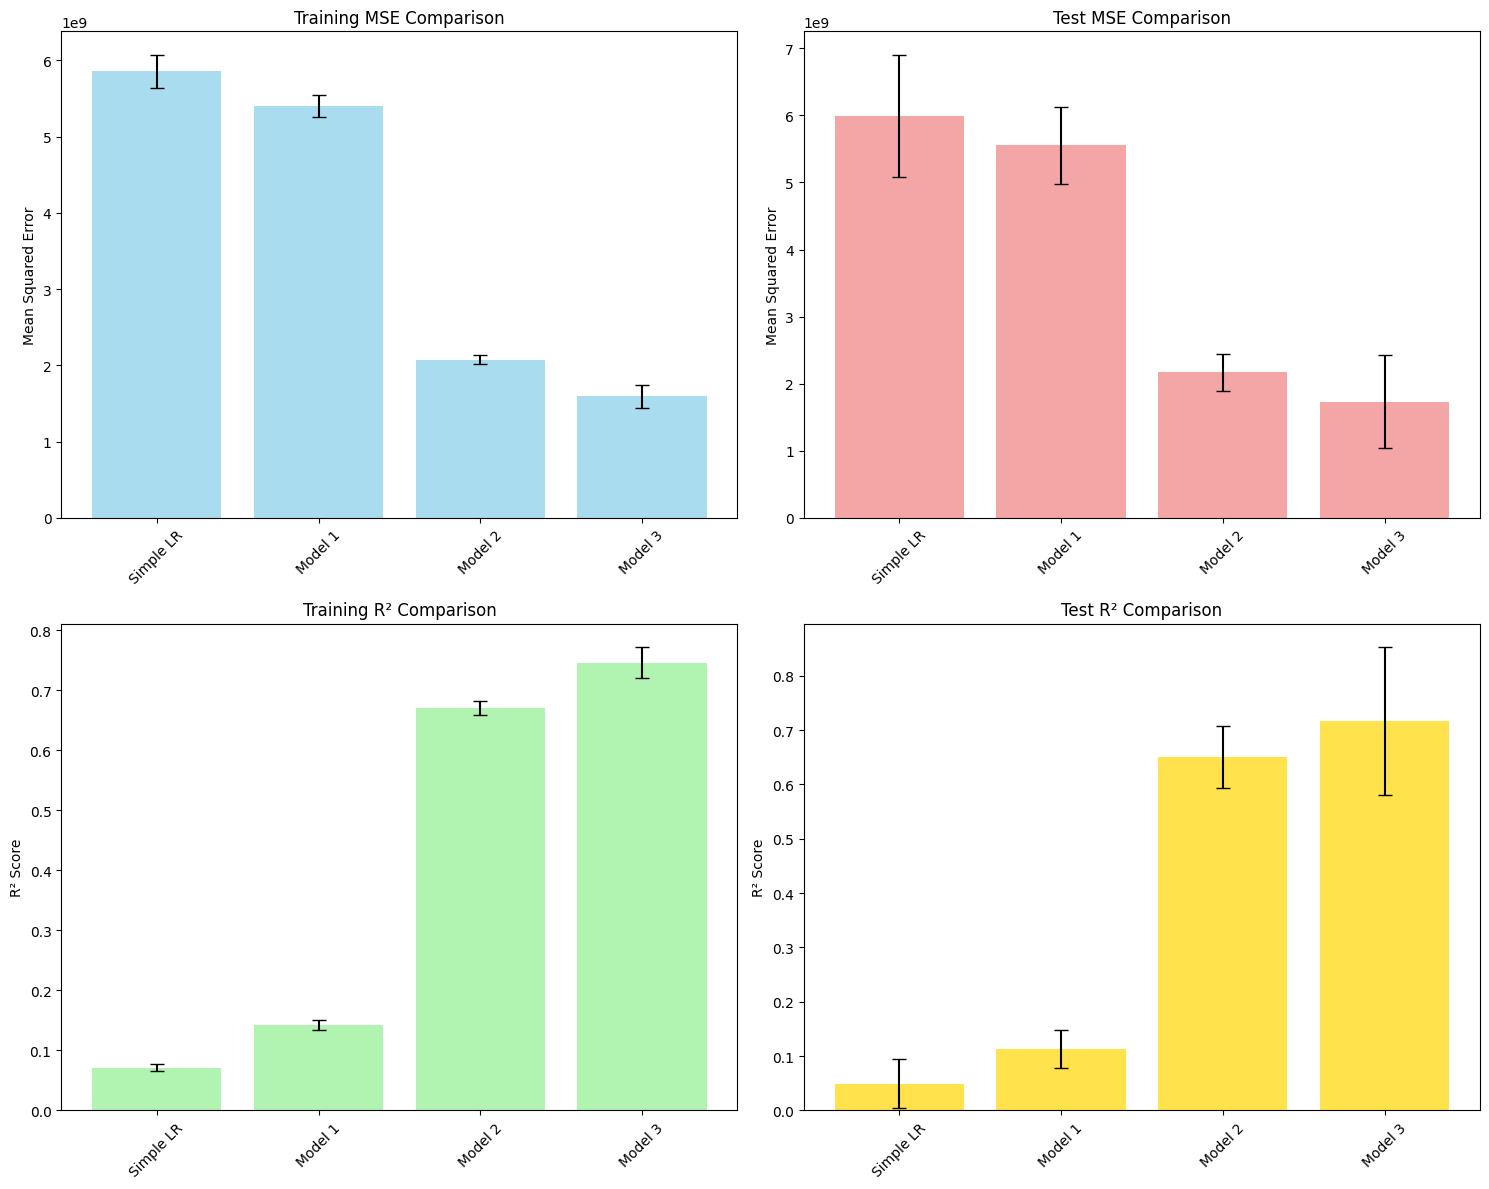


MODEL PERFORMANCE SUMMARY TABLE
Model                          Train MSE    Test MSE     Train R²     Test R²     
--------------------------------------------------------------------------------
Simple LR                      5856065427.68 5995826265.93 0.0715       0.0495      
Model 1                        5405443309.64 5555904889.54 0.1426       0.1136      
Model 2                        2074735923.03 2169949347.89 0.6707       0.6509      
Model 3                        1595473561.18 1734881618.52 0.7466       0.7166      


In [38]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Prepare data for plotting
model_names = list(models_data.keys())
train_mse_means = [summary_results[name]['avg_train_mse'] for name in model_names]
test_mse_means = [summary_results[name]['avg_test_mse'] for name in model_names]
train_r2_means = [summary_results[name]['avg_train_r2'] for name in model_names]
test_r2_means = [summary_results[name]['avg_test_r2'] for name in model_names]

train_mse_stds = [summary_results[name]['std_train_mse'] for name in model_names]
test_mse_stds = [summary_results[name]['std_test_mse'] for name in model_names]
train_r2_stds = [summary_results[name]['std_train_r2'] for name in model_names]
test_r2_stds = [summary_results[name]['std_test_r2'] for name in model_names]

# Shorten model names for better visualization
short_names = ['Simple LR', 'Model 1', 'Model 2', 'Model 3']

# Plot 1: Training MSE Comparison
ax1.bar(short_names, train_mse_means, yerr=train_mse_stds, capsize=5, alpha=0.7, color='skyblue')
ax1.set_title('Training MSE Comparison')
ax1.set_ylabel('Mean Squared Error')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Test MSE Comparison
ax2.bar(short_names, test_mse_means, yerr=test_mse_stds, capsize=5, alpha=0.7, color='lightcoral')
ax2.set_title('Test MSE Comparison')
ax2.set_ylabel('Mean Squared Error')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Training R² Comparison
ax3.bar(short_names, train_r2_means, yerr=train_r2_stds, capsize=5, alpha=0.7, color='lightgreen')
ax3.set_title('Training R² Comparison')
ax3.set_ylabel('R² Score')
ax3.tick_params(axis='x', rotation=45)

# Plot 4: Test R² Comparison
ax4.bar(short_names, test_r2_means, yerr=test_r2_stds, capsize=5, alpha=0.7, color='gold')
ax4.set_title('Test R² Comparison')
ax4.set_ylabel('R² Score')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Also create a summary table
print("\nMODEL PERFORMANCE SUMMARY TABLE")
print("="*80)
print(f"{'Model':<30} {'Train MSE':<12} {'Test MSE':<12} {'Train R²':<12} {'Test R²':<12}")
print("-" * 80)
for i, name in enumerate(model_names):
    short_name = short_names[i]
    print(f"{short_name:<30} {train_mse_means[i]:<12.2f} {test_mse_means[i]:<12.2f} {train_r2_means[i]:<12.4f} {test_r2_means[i]:<12.4f}")
print("="*80)

In [39]:
# Model Analysis and Conclusions
print("MODEL ANALYSIS AND INSIGHTS")
print("="*80)

# Find the best performing model
best_test_r2_idx = np.argmax(test_r2_means)
best_test_mse_idx = np.argmin(test_mse_means)

print(f"\nBest Model by Test R² Score: {short_names[best_test_r2_idx]} (R² = {test_r2_means[best_test_r2_idx]:.4f})")
print(f"Best Model by Test MSE: {short_names[best_test_mse_idx]} (MSE = {test_mse_means[best_test_mse_idx]:.2f})")

# Calculate improvement from simple to complex models
simple_test_r2 = test_r2_means[0]
best_test_r2 = test_r2_means[best_test_r2_idx]
improvement = ((best_test_r2 - simple_test_r2) / simple_test_r2) * 100

print(f"\nImprovement from Simple Linear Regression to Best Model: {improvement:.2f}%")

# Check for overfitting
print(f"\nOverfitting Analysis (Train R² - Test R²):")
for i, name in enumerate(short_names):
    overfitting = train_r2_means[i] - test_r2_means[i]
    print(f"  {name}: {overfitting:.4f}")

print(f"1. Simple Linear Regression (LotArea only) achieved R² = {simple_test_r2:.4f}")


# Display feature importance (from the best model)
best_model_name = list(models_data.keys())[best_test_r2_idx]
best_features = models_data[best_model_name]['features']
best_coeffs = np.mean(results[best_model_name]['coefficients'], axis=0)

print(f"\nFeature Importance in Best Model ({short_names[best_test_r2_idx]}):")
feature_importance = list(zip(best_features, np.abs(best_coeffs)))
feature_importance.sort(key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance:
    print(f"  {feature}: {importance:.2f}")

print("="*80)

MODEL ANALYSIS AND INSIGHTS

Best Model by Test R² Score: Model 3 (R² = 0.7166)
Best Model by Test MSE: Model 3 (MSE = 1734881618.52)

Improvement from Simple Linear Regression to Best Model: 1348.91%

Overfitting Analysis (Train R² - Test R²):
  Simple LR: 0.0220
  Model 1: 0.0290
  Model 2: 0.0198
  Model 3: 0.0300
1. Simple Linear Regression (LotArea only) achieved R² = 0.0495

Feature Importance in Best Model (Model 3):
  OverallQual: 31123.91
  OverallCond: 1385.18
  LotFrontage: 67.12
  GrLivArea: 40.16
  1stFlrSF: 34.87
  LotArea: 0.66


## 4. Multiple Regression with Mixed Features (Numerical + Categorical)


In [40]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

print("Examining categorical features:")
print("Street unique values:", df['Street'].unique())
print("Street value counts:", df['Street'].value_counts())
print("\nNeighborhood unique values (first 10):", df['Neighborhood'].unique()[:10])
print("Neighborhood value counts (top 10):")
print(df['Neighborhood'].value_counts().head(10))

# Checking if we have YearBuilt or need to create Year feature
print(f"\nAvailable year-related columns:")
year_columns = [col for col in df.columns if 'year' in col.lower() or 'yr' in col.lower()]
print(year_columns)

# Using YearBuilt as our Year feature
if 'YearBuilt' in df.columns:
    print(f"Using YearBuilt as Year feature")
    print(f"YearBuilt range: {df['YearBuilt'].min()} - {df['YearBuilt'].max()}")
else:
    print("YearBuilt not found, will create a dummy Year feature")

Examining categorical features:
Street unique values: ['Pave' 'Grvl']
Street value counts: Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Neighborhood unique values (first 10): ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer']
Neighborhood value counts (top 10):
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
Name: count, dtype: int64

Available year-related columns:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
Using YearBuilt as Year feature
YearBuilt range: 1872 - 2010


In [41]:
from sklearn.preprocessing import LabelEncoder

mixed_features_model4 = {
    'numerical': ['LotArea'],
    'categorical': ['Street']
}

mixed_features_model5 = {
    'numerical': ['LotArea', 'OverallCond'], 
    'categorical': ['Street', 'Neighborhood']
}

mixed_features_model6 = {
    'numerical': ['LotArea', 'OverallCond', '1stFlrSF'],
    'categorical': ['Street', 'Neighborhood', 'YearBuilt']  # Using YearBuilt as Year
}

def prepare_mixed_features_simple(df, numerical_features, categorical_features):
    """
    Prepare mixed features using Label Encoding for categorical variables
    to keep the exact number of features as specified in the assignment
    """
    # Start with numerical features
    X_mixed = df[numerical_features].copy()
    
    # Add label-encoded categorical features
    le = LabelEncoder()
    for cat_feature in categorical_features:
        if cat_feature == 'YearBuilt':
            # Use YearBuilt as-is (it's already numerical, but we'll treat it as categorical and encode it)
            X_mixed[f'{cat_feature}_encoded'] = le.fit_transform(df[cat_feature].astype(str))
        else:
            # Standard label encoding for other categorical variables
            X_mixed[f'{cat_feature}_encoded'] = le.fit_transform(df[cat_feature])
    
    return X_mixed

print("Preparing mixed feature datasets with correct feature counts...")
print("Using Label Encoding to maintain exact feature counts as per assignment")

X_model4 = prepare_mixed_features_simple(df, 
                                          mixed_features_model4['numerical'], 
                                          mixed_features_model4['categorical'])

X_model5 = prepare_mixed_features_simple(df, 
                                          mixed_features_model5['numerical'], 
                                          mixed_features_model5['categorical'])

X_model6 = prepare_mixed_features_simple(df, 
                                          mixed_features_model6['numerical'], 
                                          mixed_features_model6['categorical'])

print(f"Model 4 shape: {X_model4.shape} (Expected: 2 features)")
print(f"Model 5 shape: {X_model5.shape} (Expected: 4 features)")  
print(f"Model 6 shape: {X_model6.shape} (Expected: 6 features)")

print(f"\nModel 4 features: {list(X_model4.columns)}")
print(f"Model 5 features: {list(X_model5.columns)}")
print(f"Model 6 features: {list(X_model6.columns)}")

print(f"\nFeature specifications as per assignment:")
print(f"Model 4: LotArea, Street")
print(f"Model 5: LotArea, OverallCond, Street, Neighborhood") 
print(f"Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year")

Preparing mixed feature datasets with correct feature counts...
Using Label Encoding to maintain exact feature counts as per assignment
Model 4 shape: (1460, 2) (Expected: 2 features)
Model 5 shape: (1460, 4) (Expected: 4 features)
Model 6 shape: (1460, 6) (Expected: 6 features)

Model 4 features: ['LotArea', 'Street_encoded']
Model 5 features: ['LotArea', 'OverallCond', 'Street_encoded', 'Neighborhood_encoded']
Model 6 features: ['LotArea', 'OverallCond', '1stFlrSF', 'Street_encoded', 'Neighborhood_encoded', 'YearBuilt_encoded']

Feature specifications as per assignment:
Model 4: LotArea, Street
Model 5: LotArea, OverallCond, Street, Neighborhood
Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year


In [42]:
mixed_models_data = {
    'Model 4 (LotArea, Street)': {'X': X_model4, 'features': mixed_features_model4},
    'Model 5 (LotArea, OverallCond, Street, Neighborhood)': {'X': X_model5, 'features': mixed_features_model5},
    'Model 6 (LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year)': {'X': X_model6, 'features': mixed_features_model6}
}

# Store results for mixed models
mixed_results = {model_name: {
    'train_mse': [], 'test_mse': [], 'train_r2': [], 'test_r2': [], 
    'coefficients': [], 'intercepts': [], 'feature_names': []
} for model_name in mixed_models_data.keys()}

print("Starting K-Fold Cross Validation for Mixed Models...")
print(f"Using {k}-fold cross validation")
print("="*60)

# Perform K-Fold Cross Validation for mixed models
fold = 1
for train_index, test_index in kf.split(y):
    print(f"\nFold {fold}:")
    print("-" * 20)
    
    # Split data for this fold
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train and evaluate each mixed model
    for model_name, model_info in mixed_models_data.items():
        X = model_info['X']
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        
        # Create and train linear regression model
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = lr.predict(X_train)
        y_test_pred = lr.predict(X_test)
        
        # Calculate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Store results
        mixed_results[model_name]['train_mse'].append(train_mse)
        mixed_results[model_name]['test_mse'].append(test_mse)
        mixed_results[model_name]['train_r2'].append(train_r2)
        mixed_results[model_name]['test_r2'].append(test_r2)
        mixed_results[model_name]['coefficients'].append(lr.coef_)
        mixed_results[model_name]['intercepts'].append(lr.intercept_)
        mixed_results[model_name]['feature_names'] = list(X.columns)
        
        print(f"{model_name}:")
        print(f"  Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
        print(f"  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    
    fold += 1

print("\nK-Fold Cross Validation for Mixed Models completed!")
print("="*60)

Starting K-Fold Cross Validation for Mixed Models...
Using 5-fold cross validation

Fold 1:
--------------------
Model 4 (LotArea, Street):
  Train MSE: 5501517875.25, Test MSE: 7066617147.62
  Train R²: 0.0776, Test R²: 0.0787
Model 5 (LotArea, OverallCond, Street, Neighborhood):
  Train MSE: 5255968054.67, Test MSE: 6627543389.01
  Train R²: 0.1188, Test R²: 0.1360
Model 6 (LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year):
  Train MSE: 2731781241.83, Test MSE: 3112864268.77
  Train R²: 0.5420, Test R²: 0.5942

Fold 2:
--------------------
Model 4 (LotArea, Street):
  Train MSE: 5681823026.86, Test MSE: 6353847486.19
  Train R²: 0.0800, Test R²: 0.0655
Model 5 (LotArea, OverallCond, Street, Neighborhood):
  Train MSE: 5420442699.55, Test MSE: 5973014669.19
  Train R²: 0.1223, Test R²: 0.1215
Model 6 (LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year):
  Train MSE: 2770274250.89, Test MSE: 2928670148.33
  Train R²: 0.5514, Test R²: 0.5693

Fold 3:
------------------

In [43]:
# Calculate and display average performance metrics for mixed models
print("\n" + "="*80)
print("SUMMARY OF MIXED MODEL PERFORMANCE ACROSS ALL FOLDS")
print("="*80)

mixed_summary_results = {}
for model_name in mixed_models_data.keys():
    avg_train_mse = np.mean(mixed_results[model_name]['train_mse'])
    avg_test_mse = np.mean(mixed_results[model_name]['test_mse'])
    avg_train_r2 = np.mean(mixed_results[model_name]['train_r2'])
    avg_test_r2 = np.mean(mixed_results[model_name]['test_r2'])
    
    std_train_mse = np.std(mixed_results[model_name]['train_mse'])
    std_test_mse = np.std(mixed_results[model_name]['test_mse'])
    std_train_r2 = np.std(mixed_results[model_name]['train_r2'])
    std_test_r2 = np.std(mixed_results[model_name]['test_r2'])
    
    mixed_summary_results[model_name] = {
        'avg_train_mse': avg_train_mse, 'avg_test_mse': avg_test_mse,
        'avg_train_r2': avg_train_r2, 'avg_test_r2': avg_test_r2,
        'std_train_mse': std_train_mse, 'std_test_mse': std_test_mse,
        'std_train_r2': std_train_r2, 'std_test_r2': std_test_r2
    }
    
    print(f"\n{model_name}:")
    print(f"  Average Train MSE: {avg_train_mse:.2f} (±{std_train_mse:.2f})")
    print(f"  Average Test MSE:  {avg_test_mse:.2f} (±{std_test_mse:.2f})")
    print(f"  Average Train R²:  {avg_train_r2:.4f} (±{std_train_r2:.4f})")
    print(f"  Average Test R²:   {avg_test_r2:.4f} (±{std_test_r2:.4f})")

print("\n" + "="*80)


SUMMARY OF MIXED MODEL PERFORMANCE ACROSS ALL FOLDS

Model 4 (LotArea, Street):
  Average Train MSE: 5799276546.34 (±208592563.99)
  Average Test MSE:  5937730454.03 (±846454578.12)
  Average Train R²:  0.0804 (±0.0049)
  Average Test R²:   0.0577 (±0.0357)

Model 5 (LotArea, OverallCond, Street, Neighborhood):
  Average Train MSE: 5512354841.79 (±188471124.56)
  Average Test MSE:  5668347710.49 (±794218108.66)
  Average Train R²:  0.1258 (±0.0074)
  Average Test R²:   0.0995 (±0.0491)

Model 6 (LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year):
  Average Train MSE: 2788358535.52 (±107769780.68)
  Average Test MSE:  2912636507.51 (±476500887.22)
  Average Train R²:  0.5575 (±0.0191)
  Average Test R²:   0.5311 (±0.0965)



In [44]:


# Extract LotArea coefficients from all models
print("LOTAREA COEFFICIENT ANALYSIS ACROSS ALL MODELS")
print("="*80)

# Function to extract LotArea coefficient from model results
def get_lotarea_coefficient(model_results, feature_names):
    """Extract the LotArea coefficient from model results"""
    coefficients = np.mean(model_results['coefficients'], axis=0)
    
    # Find the index of LotArea in the feature names
    if 'LotArea' in feature_names:
        lotarea_idx = feature_names.index('LotArea')
        return coefficients[lotarea_idx]
    else:
        return None

# Collect LotArea coefficients from all models
lotarea_coefficients = {}
model_labels = []

# Original models (1-3)
original_model_names = ['Simple Linear Regression (LotArea only)', 'Model 1 (LotFrontage, LotArea)', 
                       'Model 2 (LotFrontage, LotArea, OverallQual, OverallCond)', 'Model 3 (All features)']

for model_name in original_model_names:
    if model_name in results:
        features = models_data[model_name]['features']
        coef = get_lotarea_coefficient(results[model_name], features)
        if coef is not None:
            lotarea_coefficients[model_name] = coef
            model_labels.append(model_name.split('(')[0].strip())

# Mixed models (4-6)
mixed_model_names = list(mixed_models_data.keys())
for model_name in mixed_model_names:
    feature_names = mixed_results[model_name]['feature_names']
    coef = get_lotarea_coefficient(mixed_results[model_name], feature_names)
    if coef is not None:
        lotarea_coefficients[model_name] = coef
        model_labels.append(model_name.split('(')[0].strip())

# Display the coefficients
print("LotArea coefficients across all models:")
print("-" * 50)
for i, (model_name, coef) in enumerate(lotarea_coefficients.items()):
    print(f"{model_labels[i]}: {coef:.4f}")

print("\n" + "="*80)

LOTAREA COEFFICIENT ANALYSIS ACROSS ALL MODELS
LotArea coefficients across all models:
--------------------------------------------------
Simple Linear Regression: 2.1849
Model 1: 1.4830
Model 2: 1.2357
Model 3: 0.6618
Model 4: 2.3371
Model 5: 2.2721
Model 6: 1.0959



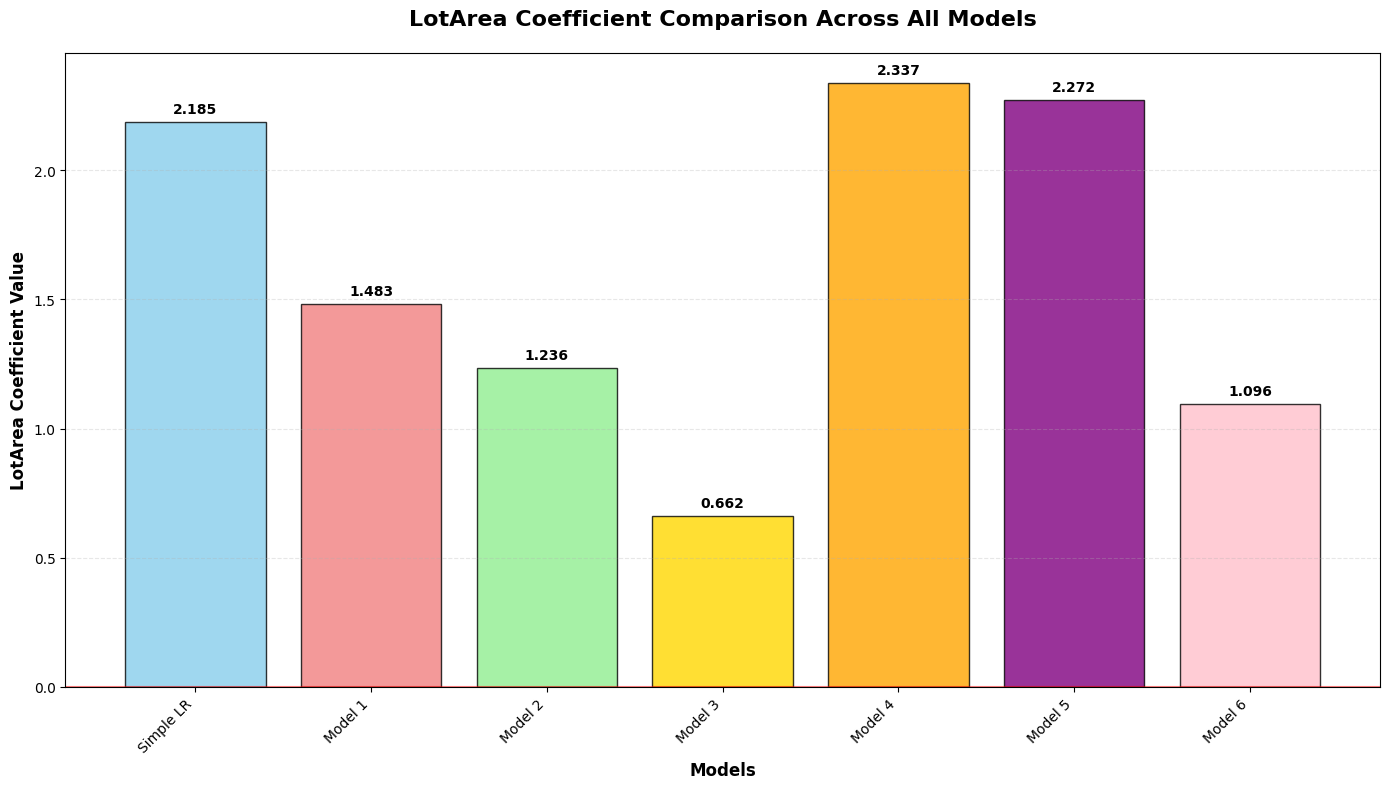


DETAILED LOTAREA COEFFICIENT COMPARISON
Model           LotArea Coeff   Features Description                              
--------------------------------------------------------------------------------
Simple LR       2.1849          LotArea only                                      
Model 1         1.4830          LotFrontage + LotArea                             
Model 2         1.2357          LotFrontage + LotArea + OverallQual + OverallCond 
Model 3         0.6618          LotFrontage + LotArea + OverallQual + OverallCond + 1stFlrSF + GrLivArea
Model 4         2.3371          LotArea + Street (categorical)                    
Model 5         2.2721          LotArea + OverallCond + Street + Neighborhood (categorical)
Model 6         1.0959          LotArea + OverallCond + Street + 1stFlrSF + Neighborhood + Year (categorical)


In [45]:
# Create visualization of LotArea coefficients across all models
plt.figure(figsize=(14, 8))

# Prepare data for plotting
coefficients_values = list(lotarea_coefficients.values())
short_model_names = ['Simple LR', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']

# Create the bar plot
bars = plt.bar(range(len(coefficients_values)), coefficients_values, 
               color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'orange', 'purple', 'pink'],
               alpha=0.8, edgecolor='black', linewidth=1)

# Customize the plot
plt.title('LotArea Coefficient Comparison Across All Models', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('LotArea Coefficient Value', fontsize=12, fontweight='bold')
plt.xticks(range(len(coefficients_values)), short_model_names, rotation=45, ha='right')

# Add value labels on top of each bar
for i, (bar, value) in enumerate(zip(bars, coefficients_values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(coefficients_values)*0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

# Create a detailed comparison table
print("\nDETAILED LOTAREA COEFFICIENT COMPARISON")
print("="*80)
print(f"{'Model':<15} {'LotArea Coeff':<15} {'Features Description':<50}")
print("-" * 80)

model_descriptions = [
    "LotArea only",
    "LotFrontage + LotArea", 
    "LotFrontage + LotArea + OverallQual + OverallCond",
    "LotFrontage + LotArea + OverallQual + OverallCond + 1stFlrSF + GrLivArea",
    "LotArea + Street (categorical)",
    "LotArea + OverallCond + Street + Neighborhood (categorical)",
    "LotArea + OverallCond + Street + 1stFlrSF + Neighborhood + Year (categorical)"
]

for i, (coef, desc) in enumerate(zip(coefficients_values, model_descriptions)):
    print(f"{short_model_names[i]:<15} {coef:<15.4f} {desc:<50}")

print("="*80)

In [46]:
# Analysis of LotArea coefficient changes
print("ANALYSIS OF LOTAREA COEFFICIENT CHANGES")
print("="*80)

# Calculate percentage changes
base_coef = coefficients_values[0]  # Simple LR coefficient
print(f"Base LotArea coefficient (Simple LR): {base_coef:.4f}")
print("\nPercentage changes from base model:")
print("-" * 40)

for i, (model_name, coef) in enumerate(zip(short_model_names[1:], coefficients_values[1:]), 1):
    change = ((coef - base_coef) / base_coef) * 100
    print(f"{model_name}: {change:+.2f}%")

# Statistical analysis
print(f"\nStatistical Summary of LotArea Coefficients:")
print(f"Mean: {np.mean(coefficients_values):.4f}")
print(f"Standard Deviation: {np.std(coefficients_values):.4f}")
print(f"Range: {min(coefficients_values):.4f} to {max(coefficients_values):.4f}")



# Compare model performance
print(f"\nModel Performance Summary (Test R²):")
print("-" * 40)

# Get test R² scores for all models
all_test_r2 = []
all_model_names = []

# Original models
for model_name in original_model_names:
    if model_name in summary_results:
        all_test_r2.append(summary_results[model_name]['avg_test_r2'])
        all_model_names.append(model_name.split('(')[0].strip())

# Mixed models  
for model_name in mixed_model_names:
    if model_name in mixed_summary_results:
        all_test_r2.append(mixed_summary_results[model_name]['avg_test_r2'])
        all_model_names.append(model_name.split('(')[0].strip())

for i, (model_name, r2) in enumerate(zip(short_model_names, all_test_r2)):
    print(f"{model_name}: {r2:.4f}")

print("="*80)

ANALYSIS OF LOTAREA COEFFICIENT CHANGES
Base LotArea coefficient (Simple LR): 2.1849

Percentage changes from base model:
----------------------------------------
Model 1: -32.13%
Model 2: -43.45%
Model 3: -69.71%
Model 4: +6.97%
Model 5: +3.99%
Model 6: -49.84%

Statistical Summary of LotArea Coefficients:
Mean: 1.6101
Standard Deviation: 0.6115
Range: 0.6618 to 2.3371

Model Performance Summary (Test R²):
----------------------------------------
Simple LR: 0.0495
Model 1: 0.1136
Model 2: 0.6509
Model 3: 0.7166
Model 4: 0.0577
Model 5: 0.0995
Model 6: 0.5311


CREATING COMPREHENSIVE R² COMPARISON VISUALIZATION


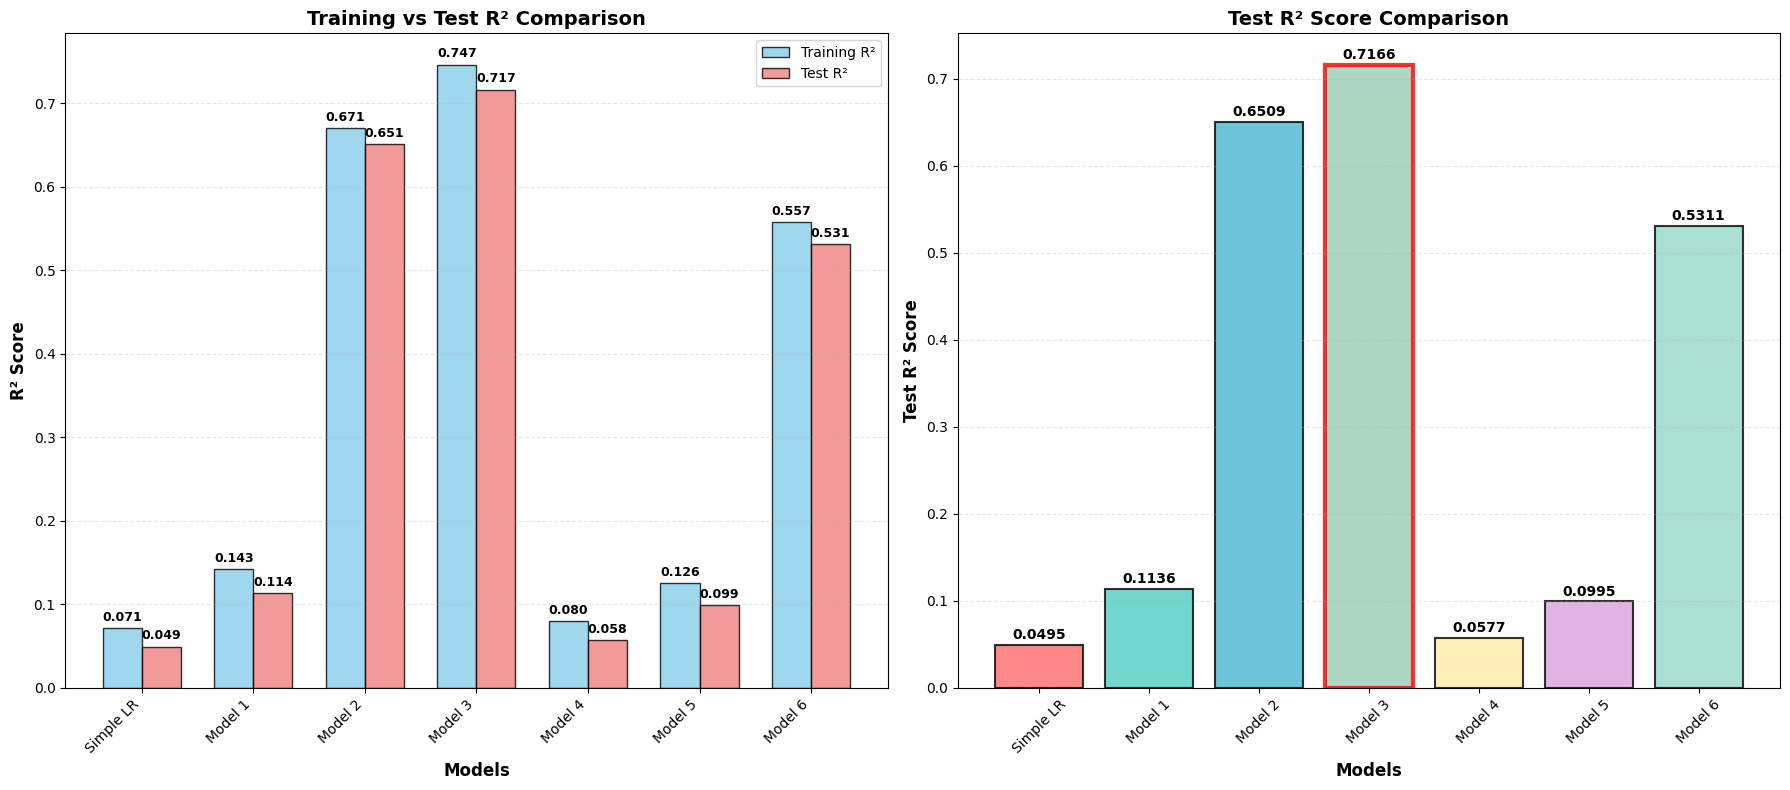


Best performing model: Model 3 with Test R² = 0.7166


In [47]:
# Comprehensive R² Comparison Plot
print("CREATING COMPREHENSIVE R² COMPARISON VISUALIZATION")
print("="*80)

# Prepare data for R² comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Get R² scores for all models
all_train_r2 = []
all_test_r2 = []
model_names_for_plot = []

# Original models (1-4)
for model_name in original_model_names:
    if model_name in summary_results:
        all_train_r2.append(summary_results[model_name]['avg_train_r2'])
        all_test_r2.append(summary_results[model_name]['avg_test_r2'])
        model_names_for_plot.append(model_name.split('(')[0].strip())

# Mixed models (4-6)
for model_name in mixed_model_names:
    if model_name in mixed_summary_results:
        all_train_r2.append(mixed_summary_results[model_name]['avg_train_r2'])
        all_test_r2.append(mixed_summary_results[model_name]['avg_test_r2'])
        model_names_for_plot.append(model_name.split('(')[0].strip())

# Short names for better visualization
short_names_r2 = ['Simple LR', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']

# Plot 1: Side-by-side comparison of Train vs Test R²
x_pos = np.arange(len(short_names_r2))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, all_train_r2, width, 
               label='Training R²', color='skyblue', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, all_test_r2, width,
               label='Test R²', color='lightcoral', alpha=0.8, edgecolor='black')

ax1.set_xlabel('Models', fontsize=12, fontweight='bold')
ax1.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax1.set_title('Training vs Test R² Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(short_names_r2, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 2: Test R² scores only (cleaner view)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']
bars3 = ax2.bar(short_names_r2, all_test_r2, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

ax2.set_xlabel('Models', fontsize=12, fontweight='bold')
ax2.set_ylabel('Test R² Score', fontsize=12, fontweight='bold')
ax2.set_title('Test R² Score Comparison', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.003,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Highlight the best performing model
best_idx = np.argmax(all_test_r2)
bars3[best_idx].set_edgecolor('red')
bars3[best_idx].set_linewidth(3)

plt.tight_layout()
plt.show()

print(f"\nBest performing model: {short_names_r2[best_idx]} with Test R² = {all_test_r2[best_idx]:.4f}")
print("="*80)